### pre processing
 we create silence files, pad short files and make training and validation sets

In [1]:
import numpy as np
import librosa
import librosa.display
import os
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import soundfile as sf

In [65]:
train_dir = './data/train/audio/' #download files from kaggle

classes = ['yes', 'no', 
           'up', 'down', 
           'left', 'right', 
           'on', 'off', 
           'stop', 'go',
         #   'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
           'silence']

run this cell to move the background noises folder out of the audio directory. We will create silence samples from these files after.

In [3]:
%%bash
mv data/train/audio/_background_noise_ data/train
ls data/train

LICENSE
README.md
_background_noise_
audio
testing_list.txt
validation_list.txt


Split all the audio files from \_background\_noises\_ folder in 1-sec chunks

In [3]:
def split_arr(arr):
    """
    split an array into chunks of length 16000
    Returns:
        list of arrays
    """
    return np.split(arr, np.arange(16000, len(arr), 16000))

In [4]:
def create_silence():
   """
   reads wav files in background noises folder, 
   splits them and saves to silence folder in train_dir
   """
   sampleRate = 16000 # hertz
   for file in os.listdir('data/train/_background_noise_/'):
      if 'wav' in file:
         sig, rate = librosa.load('data/train/_background_noise_/' + file, sr = 16000)        
         sig_arr = split_arr(sig)
         if not os.path.exists(train_dir+'silence/'):
               os.makedirs(train_dir+'silence/')
         for ind, arr in enumerate(sig_arr):
               filename = 'frag%d' %ind + '_%s' %file # example: frag0_running_tap.wav
               sf.write(train_dir+'silence/'+filename, arr, sampleRate)
  

In [5]:
create_silence()

TypeError: an integer is required

It is probably a good idea to make more silence samples yourself. 
Perhaps just by recording walking or driving around without speaking.
the silence class is underrepresented.

three lists with file names. one for training set, one for validation set, one for all. Plus a dictionary with file counts per class.

In [66]:
folders = os.listdir(train_dir)
# put folders in same order as in the classes list, used when making sets
all_classes = [x for x in classes]
for ind, cl in enumerate(folders):
    if cl not in classes:
        all_classes.append(cl)
print(all_classes)

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence', 'bird', 'bed', 'house', 'seven', 'six', 'nine', 'dog', 'two', 'eight', 'four', 'tree', 'zero', 'marvin', 'happy', 'sheila', 'wow', 'three', 'one', 'cat', 'five']


In [6]:
with open('./data/train/validation_list.txt') as val_list:
    validation_list = [row[0] for row in csv.reader(val_list)]
assert len(validation_list) == 6798, 'file not loaded'

"""
#if you want to add the files in testing_list.txt to the validation list:

with open('./data/train/testing_list.txt') as test_list:
    testing_list = [row[0] for row in csv.reader(test_list)]
assert len(testing_list) == 6835, 'file not loaded'

#combine into validation set
validation_list.extend(testing_list)
"""
#add silence files to validation_list
for i, file in enumerate(os.listdir(train_dir + 'silence/')):
    if i%10==0:
        validation_list.append('silence/'+file)

training_list = []
all_files_list = []
class_counts = {}

for folder in folders:
    files = os.listdir(train_dir + folder)
    for i, f in enumerate(files):
        all_files_list.append(folder + '/' + f)
        path = folder + '/' + f
        if path not in validation_list:
            training_list.append(folder + '/' + f)        
        class_counts[folder] = i

#remove filenames from validation_list that don't exist anymore (due to eda)
validation_list = list(set(validation_list).intersection(all_files_list))

In [7]:
assert len(validation_list)+len(training_list)==len(all_files_list), 'error'

In [8]:
# check random file name
print(training_list[345], 'size training set: ',len(training_list), 'size validation set: ', len(validation_list))

bird/ed0720f1_nohash_0.wav size training set:  58284 size validation set:  6839


In [9]:
print(class_counts)
# {'tree': 1732, 'sheila': 1733, 'bird': 1730, 'no': 2374, 'four': 2371, 'zero': 2375, 'up': 2374, 'five': 2356, 'cat': 1732, 'yes': 2376, 'eight': 2351, 'off': 2356, 'seven': 2376, 'house': 1749, 'happy': 1741, 'three': 2355, 'left': 2352, 'two': 2372, 'bed': 1712, 'nine': 2363, 'dog': 1745, 'down': 2358, 'wow': 1744, 'right': 2366, 'on': 2366, 'one': 2369, 'go': 2371, 'marvin': 1745, 'stop': 2379, 'six': 2368, 'silence': 401}

{'bird': 1730, 'yes': 2376, 'bed': 1712, 'house': 1749, 'seven': 2376, 'six': 2368, 'down': 2358, 'nine': 2363, 'dog': 1745, 'silence': 401, 'two': 2372, 'no': 2374, 'eight': 2351, 'right': 2366, 'go': 2371, 'four': 2371, 'tree': 1732, 'zero': 2375, 'marvin': 1745, 'happy': 1741, 'sheila': 1733, 'up': 2374, 'wow': 1744, 'three': 2355, 'one': 2369, 'cat': 1732, 'five': 2356, 'on': 2366, 'stop': 2379, 'left': 2352, 'off': 2356}


plot a wav file

min:  -0.1182251 
max:  0.10827637 
mean:  7.842428e-06 
median:  0.0 
variance:  0.0003236237 
length:  10923


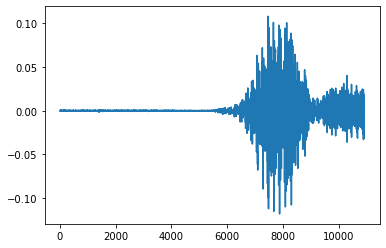

In [10]:
x, r = librosa.load(train_dir + 'yes/bfdb9801_nohash_0.wav', sr = 16000)
print('min: ',np.min(x), 
      '\nmax: ', np.max(x), 
      '\nmean: ', np.mean(x),
      '\nmedian: ', np.median(x),
      '\nvariance: ', np.var(x),
      '\nlength: ', len(x))
plt.plot(x)

### turn all wav files into spectrograms

In [11]:
def make_spec(file, file_dir = train_dir, flip = False, ps = False, st = 4):
    """
    create a melspectrogram from the amplitude of the sound
    
    Args:
        file (str): filename
        file_dir (str): directory path
        flip (bool): reverse time axis
        ps (bool): pitch shift
        st (int): half-note steps for pitch shift
    Returns:
        np.array with shape (122,85) (time, freq)
    """
    sig, rate = librosa.load(file_dir + file, sr = 16000)
    if len(sig) < 16000: # pad shorter than 1 sec audio with ramp to zero
        sig = np.pad(sig, (0,16000-len(sig)), 'linear_ramp')
    if ps:
        sig = librosa.effects.pitch_shift(sig, rate, st)
    D = librosa.amplitude_to_db(librosa.stft(sig[:16000], n_fft = 512, 
                                             hop_length = 128, 
                                             center = False), ref = np.max)
    S = librosa.feature.melspectrogram(S=D, n_mels = 85).T
    if flip:
        S = np.flipud(S)
    return S.astype(np.float32)

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


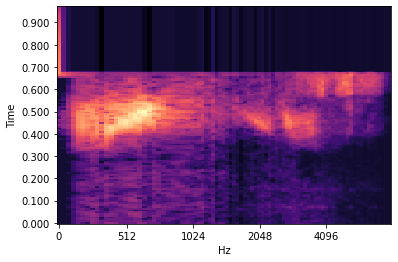

In [12]:
librosa.display.specshow(make_spec('yes/bfdb9801_nohash_0.wav'), 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

In [13]:
make_spec('yes/bfdb9801_nohash_0.wav').shape

(122, 85)

In [80]:
def create_sets(file_list = training_list):
    X_array = np.zeros([len(file_list),122,85])
    Y_array = np.zeros([len(file_list)])    
    for ind, file in enumerate(file_list):
        if ind%2000 == 0:
            print(ind, file)
        try:
            X_array[ind] = make_spec(file)
        except ValueError:
            print(ind, file, ValueError)
        Y_array[ind] = all_classes.index(file.rsplit('/')[0])
        
    return X_array, Y_array        
        

In [69]:
def print_sets(file_list = training_list):
    for ind, file in enumerate(file_list):
        if ind%2000 == 0:
            print(ind, file, file.rsplit('/')[0], all_classes.index(file.rsplit('/')[0]))
print_sets()

0 bird/de650823_nohash_0.wav bird 11
2000 yes/d1a4fb3f_nohash_1.wav yes 0
4000 bed/bf4af1af_nohash_0.wav bed 12
6000 house/16d41d07_nohash_0.wav house 13
8000 seven/40115b19_nohash_0.wav seven 14
10000 six/8d5d076d_nohash_0.wav six 15
12000 down/ee07dcb9_nohash_2.wav down 3
14000 nine/c08e5058_nohash_0.wav nine 16
16000 dog/3d9200b9_nohash_1.wav dog 17
18000 two/eb3f7d82_nohash_3.wav two 18
20000 no/20d3f11f_nohash_0.wav no 1
22000 eight/617de221_nohash_3.wav eight 19
24000 right/7e783e3f_nohash_0.wav right 5
26000 go/784e281a_nohash_1.wav go 9
28000 four/9587481f_nohash_1.wav four 20
30000 tree/78622c2b_nohash_0.wav tree 21
32000 zero/5aac2efa_nohash_0.wav zero 22
34000 marvin/402e2977_nohash_0.wav marvin 23
36000 happy/530306f5_nohash_0.wav happy 24
38000 sheila/19e98e89_nohash_0.wav sheila 25
40000 up/f7b43563_nohash_0.wav up 2
42000 three/2039b9c1_nohash_0.wav three 27
44000 three/24c9f572_nohash_0.wav three 27
46000 one/95ba4996_nohash_0.wav one 28
48000 five/e91d173e_nohash_0.wav

In [68]:
X_train, Y_train_all = create_sets() # takes a while
# 0 yes/8a28231e_nohash_3.wav
# 2000 yes/21307344_nohash_0.wav
# 4000 silence/frag55_dude_miaowing.wav
# 6000 nine/283d7a53_nohash_1.wav
# 8000 four/31d31fa0_nohash_0.wav
# 10000 wow/d84829e0_nohash_0.wav
# 12000 five/173e6bbf_nohash_0.wav
# 14000 stop/bbd0bbd0_nohash_4.wav
# 16000 off/29fb33da_nohash_0.wav
# 18000 zero/39543cfd_nohash_1.wav
# 20000 tree/6a203e0e_nohash_3.wav
# 22000 up/01b4757a_nohash_0.wav
# 24000 six/21cbe292_nohash_0.wav
# 26000 one/3b852f6f_nohash_0.wav
# 28000 down/b959cd0c_nohash_4.wav
# 30000 three/23abe1c9_nohash_1.wav
# 32000 three/f953e1af_nohash_1.wav
# 34000 right/75915c90_nohash_0.wav
# 36000 eight/85b877b5_nohash_0.wav
# 38000 no/88053e92_nohash_0.wav
# 40000 two/a1c63f25_nohash_0.wav
# 42000 two/c1d39ce8_nohash_8.wav
# 44000 seven/72ca6a6d_nohash_0.wav
# 46000 on/0137b3f4_nohash_3.wav
# 48000 left/1b4c9b89_nohash_4.wav
# 50000 dog/dfb6450b_nohash_0.wav
# 52000 go/0137b3f4_nohash_2.wav
# 54000 sheila/1ecfb537_nohash_0.wav
# 56000 bed/129c7d8d_nohash_0.wav
# 58000 bird/b9f46737_nohash_0.wav

0 bird/de650823_nohash_0.wav
2000 yes/d1a4fb3f_nohash_1.wav
4000 bed/bf4af1af_nohash_0.wav
6000 house/16d41d07_nohash_0.wav
8000 seven/40115b19_nohash_0.wav
10000 six/8d5d076d_nohash_0.wav
12000 down/ee07dcb9_nohash_2.wav
14000 nine/c08e5058_nohash_0.wav
16000 dog/3d9200b9_nohash_1.wav
18000 two/eb3f7d82_nohash_3.wav
20000 no/20d3f11f_nohash_0.wav
22000 eight/617de221_nohash_3.wav
24000 right/7e783e3f_nohash_0.wav
26000 go/784e281a_nohash_1.wav
28000 four/9587481f_nohash_1.wav
30000 tree/78622c2b_nohash_0.wav
32000 zero/5aac2efa_nohash_0.wav
34000 marvin/402e2977_nohash_0.wav
36000 happy/530306f5_nohash_0.wav
38000 sheila/19e98e89_nohash_0.wav
40000 up/f7b43563_nohash_0.wav
42000 three/2039b9c1_nohash_0.wav
44000 three/24c9f572_nohash_0.wav
46000 one/95ba4996_nohash_0.wav
48000 five/e91d173e_nohash_0.wav
50000 on/28460a60_nohash_0.wav
52000 stop/2ad772d6_nohash_0.wav
54000 stop/7f74626f_nohash_4.wav
56000 left/86cb59b2_nohash_1.wav
58000 off/8134f43f_nohash_3.wav


In [70]:
# all unknown are index 11
Y_train = np.where(Y_train_all < 11, Y_train_all, 11)
print(max(Y_train_all), max(Y_train))

30.0 11.0


In [73]:
print(len(Y_train) == len(Y_train_all), 12 in Y_train)

True False


In [74]:
X_train.shape

(58284, 122, 85)

In [75]:
Y_train_all.shape

(58284,)

In [76]:
Y_train.shape

(58284,)

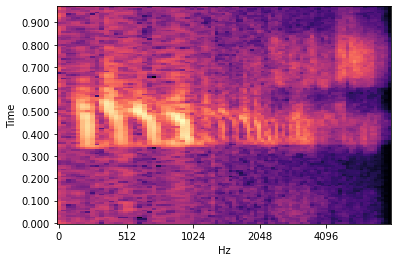

In [48]:
librosa.display.specshow(X_train[6500], 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

In [49]:
print('min: ',np.min(X_train), 
      '\nmax: ', np.max(X_train), 
      '\nmean: ', np.mean(X_train),
      '\nmedian: ', np.median(X_train),
      '\nvariance: ', np.var(X_train))

min:  -2.0306179523468018 
max:  9.682740653715882e-08 
mean:  -1.3092463950993087 
median:  -1.3604838848114014 
variance:  0.19674540582019645


(array([ 1228700.,   145193.,  3275033.,  7532820., 82702849., 22856643.,
        16916716., 16934780., 16204832., 16512884., 17009324., 17513318.,
        18006801., 18386316., 18671256., 18840007., 18900284., 18844326.,
        18653033., 18317694., 17825272., 17201050., 16471934., 15677920.,
        14857082., 14017025., 13175033., 12328085., 11507932., 10715129.,
         9952104.,  9217841.,  8526005.,  7883298.,  7285927.,  6744792.,
         6243330.,  5773618.,  5308990.,  4840521.,  4362811.,  3882954.,
         3373561.,  2829244.,  2268507.,  1743606.,  1304789.,   865260.,
          526548.,   242103.]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.86816851e+00, -1.82755615e+00, -1.78694379e+00, -1.74633143e+00,
        -1.70571906e+00, -1.66510670e+00, -1.62449434e+00, -1.58388198e+00,
        -1.54326962e+00, -1.50265726e+00, -1.46204490e+00, -1.42143254e+00,
        -1.38082018e+00, -1.34020782e+00, -1.29959545e+00, -1.25898309e+

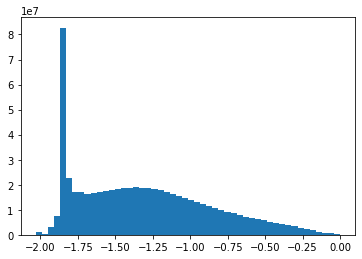

In [50]:
plt.hist(X_train.flatten(), bins = 50)

save the training sets, add channel dimension for keras,
normalize around zero

In [78]:
np.save('data/X_train.npy', np.expand_dims(X_train, -1) + np.mean(X_train))
np.save('data/Y_train.npy', Y_train.astype(np.int))
np.save('data/Y_train_all.npy', Y_train_all.astype(np.int))

In [81]:
X_val, Y_val_all = create_sets(file_list = validation_list)

0 seven/a7dd45cf_nohash_0.wav
2000 sheila/b6ebe225_nohash_0.wav
4000 bed/66cff190_nohash_2.wav
6000 left/b41a92a3_nohash_0.wav


In [82]:
Y_val = np.where(Y_val_all < 11, Y_val_all, 11)
Y_val

array([11.,  2., 11., ..., 11., 11.,  4.])

(array([  154936.,    18034.,   411637.,   957639., 10308868.,  2858924.,
         2146576.,  2155732.,  2049893.,  2059556.,  2087883.,  2115106.,
         2131919.,  2143095.,  2147224.,  2145546.,  2141189.,  2122355.,
         2092996.,  2052542.,  2000360.,  1936404.,  1859412.,  1776115.,
         1682198.,  1582751.,  1481108.,  1377721.,  1283718.,  1187675.,
         1099677.,  1022037.,   947955.,   883073.,   819663.,   757221.,
          703923.,   651081.,   595665.,   544450.,   492745.,   439754.,
          384011.,   321145.,   257802.,   198562.,   146188.,    98628.,
           61661.,    26077.]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.86816851e+00, -1.82755615e+00, -1.78694379e+00, -1.74633143e+00,
        -1.70571906e+00, -1.66510670e+00, -1.62449434e+00, -1.58388198e+00,
        -1.54326962e+00, -1.50265726e+00, -1.46204490e+00, -1.42143254e+00,
        -1.38082018e+00, -1.34020782e+00, -1.29959546e+00, -1.25898309e+

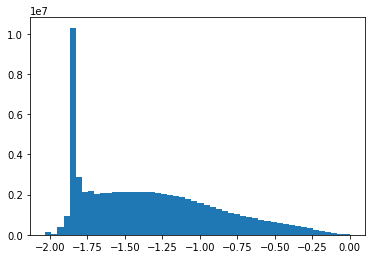

In [83]:
plt.hist(X_val.flatten(), bins = 50)

In [85]:
np.save('data/X_val.npy', np.expand_dims(X_val, -1) + np.mean(X_train))
np.save('data/Y_val.npy', Y_val.astype(np.int))
np.save('data/Y_val_all.npy', Y_val_all.astype(np.int))